<a href="https://colab.research.google.com/github/Adrianus-Bagas/Rain_Prediction/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Hujan Menggunakan ANN

## 1. Import beberapa libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# 2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Informasi Fitur
1. Date = Tanggal
2. Location = Lokasi Hujan
3. MinTemp = Suhu Minimal
4. MaxTemp = Suhu Maksimal
5. Rainfall = Curah Hujan dalam Sehari dalam mm
6. Evaporation = Kadar Evaporasi dalam mm
7. Sunshine = Waktu Matahari Bersinar dalam Jam
8. WindGustDir = Arah Hembusan Angin Terkuat
9. WindGustSpeed = Kecepatan Hembusan Angin
10. WindDir9am = Arah Angin pada Jam 9 Pagi
11. WIndDir3pm = Arah Angin pada Jam 3 Sore
12. WindSpeed9am = Kecepatan Angin pada Jam 9 Pagi
13. WindSpeed3pm = Kecepatan Angin pada Jam 3 Sore
14. Humidity9am = Kelembapan (%) pada Jam 9 Pagi
15. Humidity3pm = Kelembapan (%) pada Jam 3 Sore
16. Pressure9am = Tekanan Atmosfir pada Jam 9 Pagi
17. Pressure 3pm = Tekanan Atmosfir pada Jam 3 Sore
18. Cloud9am = Jumlah Awan pada Jam 9 Pagi
19. Cloud3pm = Jumlah Awan pada Jam 3 Sore
20. Temp9am = Suhu pada Jam 9 Pagi
21. Temp3pm = Suhu pada Jam 3 Sore
22. RainToday = Apakah Hari Ini Hujan
23. RainTomorrow (Target) = Apakah Besok Hujan 

## 3. Preprocessing

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df = df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna('Yes')
df['RainTomorrow'] = df['RainTomorrow'].fillna('Yes')

In [ ]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
def label(rain):
  if rain=='Yes':
    return 1
  else:
    return 0
df['RainToday'] = df['RainToday'].apply(label)
df['RainTomorrow'] = df['RainTomorrow'].apply(label)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


In [ ]:
X_cont = df.drop(['RainToday','RainTomorrow'],axis=1).values
X_cont

array([[13.4       , 22.9       ,  0.6       , ...,  4.50993008,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.50993008,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [ 5.4       , 26.9       ,  0.        , ...,  4.50993008,
        12.5       , 26.1       ],
       [ 7.8       , 27.        ,  0.        , ...,  2.        ,
        15.1       , 26.        ],
       [14.9       , 23.22134828,  0.        , ...,  8.        ,
        15.        , 20.9       ]])

In [ ]:
scaler = StandardScaler()
X_cont = scaler.fit_transform(X_cont)

In [ ]:
X_cont

array([[ 1.89446615e-01, -4.53363105e-02, -2.10071794e-01, ...,
        -8.48734694e-16, -1.40531282e-02,  1.70232282e-02],
       [-7.53100728e-01,  2.65043084e-01, -2.81649838e-01, ...,
        -8.48734694e-16,  3.24642790e-02,  3.81984952e-01],
       [ 1.10901003e-01,  3.49692009e-01, -2.81649838e-01, ...,
        -1.19923244e+00,  6.21684769e-01,  2.21401794e-01],
       ...,
       [-1.06728318e+00,  5.18989861e-01, -2.81649838e-01, ...,
        -8.48734694e-16, -6.96308433e-01,  6.44757393e-01],
       [-6.90264238e-01,  5.33098015e-01, -2.81649838e-01, ...,
        -1.19923244e+00, -2.93157571e-01,  6.30158924e-01],
       [ 4.25083451e-01,  2.10513377e-14, -2.81649838e-01, ...,
         1.66753850e+00, -3.08663373e-01, -1.14362992e-01]])

In [ ]:
df_new = pd.DataFrame(X_cont)
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.189447,-4.533631e-02,-0.210072,2.809331e-16,-1.952415e-15,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,-8.487347e-16,-0.014053,0.017023
1,-0.753101,2.650431e-01,-0.281650,2.809331e-16,-1.952415e-15,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,-3.920285e-16,-8.487347e-16,0.032464,0.381985
2,0.110901,3.496920e-01,-0.281650,2.809331e-16,-1.952415e-15,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,-3.920285e-16,-1.199232e+00,0.621685,0.221402
3,-0.470337,6.741796e-01,-0.281650,2.809331e-16,-1.952415e-15,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-3.920285e-16,-8.487347e-16,0.172017,0.703151
4,0.833521,1.280830e+00,-0.162353,2.809331e-16,-1.952415e-15,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,1.126652e+00,1.667539e+00,0.125499,1.170302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,2.809331e-16,-1.952415e-15,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,-3.920285e-16,-8.487347e-16,-1.068448,0.104614
145456,-1.350047,2.932594e-01,-0.281650,2.809331e-16,-1.952415e-15,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,-3.920285e-16,-8.487347e-16,-0.944401,0.411182
145457,-1.067283,5.189899e-01,-0.281650,2.809331e-16,-1.952415e-15,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,-3.920285e-16,-8.487347e-16,-0.696308,0.644757
145458,-0.690264,5.330980e-01,-0.281650,2.809331e-16,-1.952415e-15,-0.917445,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,0.186693,-6.388874e-01,-1.199232e+00,-0.293158,0.630159


In [ ]:
df_new['RainToday'] = df['RainToday']
Y = df['RainTomorrow'].values
X = df_new.values

In [ ]:
X

array([[ 1.89446615e-01, -4.53363105e-02, -2.10071794e-01, ...,
        -1.40531282e-02,  1.70232282e-02,  0.00000000e+00],
       [-7.53100728e-01,  2.65043084e-01, -2.81649838e-01, ...,
         3.24642790e-02,  3.81984952e-01,  0.00000000e+00],
       [ 1.10901003e-01,  3.49692009e-01, -2.81649838e-01, ...,
         6.21684769e-01,  2.21401794e-01,  0.00000000e+00],
       ...,
       [-1.06728318e+00,  5.18989861e-01, -2.81649838e-01, ...,
        -6.96308433e-01,  6.44757393e-01,  0.00000000e+00],
       [-6.90264238e-01,  5.33098015e-01, -2.81649838e-01, ...,
        -2.93157571e-01,  6.30158924e-01,  0.00000000e+00],
       [ 4.25083451e-01,  2.10513377e-14, -2.81649838e-01, ...,
        -3.08663373e-01, -1.14362992e-01,  0.00000000e+00]])

In [ ]:
Y

array([0, 0, 0, ..., 0, 0, 1])

## 4. Model ANN

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu', input_dim =17))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               1

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32, verbose=2)

Epoch 1/100
3637/3637 - 36s - loss: 0.4032 - accuracy: 0.8221 - val_loss: 0.3848 - val_accuracy: 0.8272 - 36s/epoch - 10ms/step
Epoch 2/100
3637/3637 - 19s - loss: 0.3877 - accuracy: 0.8304 - val_loss: 0.3834 - val_accuracy: 0.8288 - 19s/epoch - 5ms/step
Epoch 3/100
3637/3637 - 23s - loss: 0.3839 - accuracy: 0.8339 - val_loss: 0.3859 - val_accuracy: 0.8316 - 23s/epoch - 6ms/step
Epoch 4/100
3637/3637 - 19s - loss: 0.3816 - accuracy: 0.8353 - val_loss: 0.3787 - val_accuracy: 0.8316 - 19s/epoch - 5ms/step
Epoch 5/100
3637/3637 - 18s - loss: 0.3797 - accuracy: 0.8361 - val_loss: 0.3762 - val_accuracy: 0.8329 - 18s/epoch - 5ms/step
Epoch 6/100
3637/3637 - 20s - loss: 0.3787 - accuracy: 0.8370 - val_loss: 0.3744 - val_accuracy: 0.8346 - 20s/epoch - 6ms/step
Epoch 7/100
3637/3637 - 17s - loss: 0.3776 - accuracy: 0.8369 - val_loss: 0.3740 - val_accuracy: 0.8332 - 17s/epoch - 5ms/step
Epoch 8/100
3637/3637 - 18s - loss: 0.3768 - accuracy: 0.8368 - val_loss: 0.3740 - val_accuracy: 0.8367 - 18s/

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)

Accuracy : 0.8323937852330537
Precision : 0.7824644549763033
Recall : 0.45482093663911843
F1 Score : 0.5752613240418119


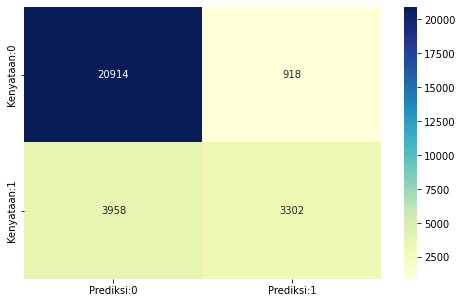

In [ ]:
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediksi:0','Prediksi:1'],index=['Kenyataan:0','Kenyataan:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

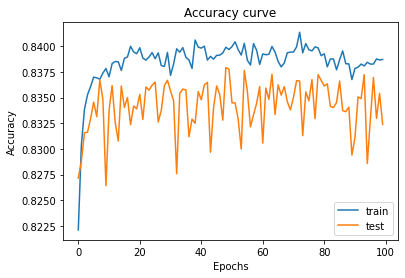

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend(['train','test'])
plt.show()

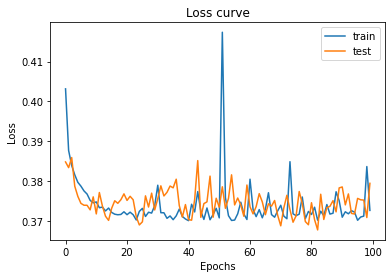

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend(['train','test'])
plt.show()